In [5]:
import yt
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import trident
from emission_functions import *
from yt.analysis_modules.star_analysis.api import StarFormationRate

## for the old, symmetric boxes
from comparative_analysis import initial_center_guess,initial_center_guess,sym_refine_box
import builtins

In [2]:
def get_refine_box(ds, zsnap, track):
    ## find closest output, modulo not updating before printout
    #diff = track['col1'] - zsnap
    #this_loc = track[np.where(diff == np.min(diff[np.where(diff > 1.e-6)]))]
    #print "using this loc:", this_loc
    x_left = np.interp(zsnap, track['col1'], track['col2'])
    y_left = np.interp(zsnap, track['col1'], track['col3'])
    z_left = np.interp(zsnap, track['col1'], track['col4'])
    x_right = np.interp(zsnap, track['col1'], track['col5'])
    y_right = np.interp(zsnap, track['col1'], track['col6'])
    z_right = np.interp(zsnap, track['col1'], track['col7'])
    refine_box_center = [0.5*(x_left+x_right), 0.5*(y_left+y_right), 0.5*(z_left+z_right)]
    refine_box = ds.r[x_left:x_right, y_left:y_right, z_left:z_right]
    refine_width = np.abs(x_right - x_left)
    return refine_box, refine_box_center, refine_width

In [3]:
baseNAT = "/Users/dalek/data/Jason/natural/nref11/RD0042/RD0042" ## or 38
baseREF = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2/RD0034/RD0034"
track_name = "/Users/dalek/data/Molly/nref11n_nref10f_refine200kpc_z4to2/halo_track_total"
track = Table.read(track_name, format='ascii')
track.sort('col1')

dsNAT = yt.load(baseNAT)
rbNAT,rbNAT_center,rbNAT_width = get_refine_box(dsNAT,dsNAT.current_redshift,track)
dsREF = yt.load(baseREF)
rbREF,rbREF_center,rbREF_width = get_refine_box(dsREF,dsREF.current_redshift,track)

rbREF_width = float(dsREF.quan(rbREF_width,'code_length').in_units('kpc').value)
rbNAT_width = float(dsNAT.quan(rbNAT_width,'code_length').in_units('kpc').value)

## this one needs a special track file
baseSYM = "/Users/dalek/data/Jason/symmetric_box_tracking/nref10f_sym50kpc/RD0042/RD0042"
builtins.track_name = '/Users/dalek/data/Jason/symmetric_box_tracking/complete_track_symmetric_50kpc'

dsSYM = yt.load(baseSYM)
center_guess = initial_center_guess(dsSYM,builtins.track_name)
halo_center = initial_center_guess(dsSYM,center_guess)
rbSYM = sym_refine_box(dsSYM,halo_center)

yt : [INFO     ] 2018-03-18 18:40:03,691 Parameters: current_time              = 639.444804405
yt : [INFO     ] 2018-03-18 18:40:03,692 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-03-18 18:40:03,693 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-03-18 18:40:03,694 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-03-18 18:40:03,695 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-03-18 18:40:03,696 Parameters: current_redshift          = 4.4408920985e-16
yt : [INFO     ] 2018-03-18 18:40:03,697 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-03-18 18:40:03,698 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-03-18 18:40:03,698 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-03-18 18:40:03,722 Parameters: current_time              = 438.201908318
yt : [INFO     ] 2018-03-18 18:40:03,723 Parameters: domain_dimensions         = [2

In [4]:
pos,val = dsREF.find_max('Dark_Matter_Density')
pos2,val2 = dsNAT.find_max('Dark_Matter_Density')
pos3,val3 = dsSYM.find_max('Dark_Matter_Density')


Parsing Hierarchy : 100%|██████████| 4571/4571 [00:00<00:00, 18753.36it/s]
yt : [INFO     ] 2018-03-18 18:40:08,143 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-03-18 18:40:32,415 Max Value is 2.70465e+08 at 0.4910678863525391 0.4768924713134766 0.5071849822998047
Parsing Hierarchy : 100%|██████████| 1738/1738 [00:00<00:00, 36066.91it/s]
yt : [INFO     ] 2018-03-18 18:40:32,532 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-03-18 18:40:39,387 Max Value is 9.68110e+08 at 0.4898443222045898 0.4713010787963867 0.5095624923706055
Parsing Hierarchy : 100%|██████████| 1947/1947 [00:00<00:00, 33870.91it/s]
yt : [INFO     ] 2018-03-18 18:40:39,646 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2018-03-18 18:40:47,419 Max Value is 2.31998e+08 at 0.4898319244384766 0.4713420867919922 0.5095615386962891


In [ ]:
proj = yt.ProjectionPlot(dsREF,'y','Density',center=val,width=(50,'kpc'))
proj.show()     

In [ ]:
proj = yt.ProjectionPlot(dsNAT,'y','Density',center=val2,width=(100,'kpc'))
proj.show()     

In [ ]:
proj = yt.ProjectionPlot(dsREF,'y','Density',center=rbREF_center,width=(rbREF_width,'kpc'),data_source=rbREF)
proj.show()     

In [6]:
spREF = dsREF.sphere(val,radius=(50.,'kpc'))
spNAT = dsNAT.sphere(val2,radius=(50.,'kpc'))
spSYM = dsSYM.sphere(val2,radius=(50.,'kpc'))

In [7]:
sfrREF = StarFormationRate(dsREF, data_source=spREF)
sfrNAT = StarFormationRate(dsNAT, data_source=spNAT)
sfrSYM = StarFormationRate(dsSYM, data_source=spSYM)

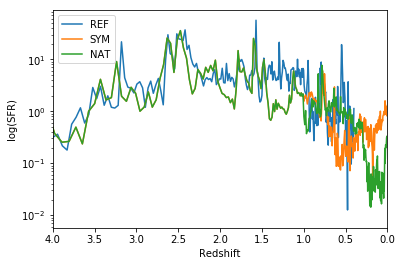

In [33]:
plt.semilogy(sfrREF.redshift,sfrREF.Msol_yr,label='REF')
plt.semilogy(sfrSYM.redshift,sfrSYM.Msol_yr,label='SYM')
plt.semilogy(sfrNAT.redshift,sfrNAT.Msol_yr,label='NAT')

plt.xlim(4,0)
#plt.ylim(0,10)
plt.xlabel('Redshift')
plt.ylabel('log(SFR)')
plt.legend()
plt.show()

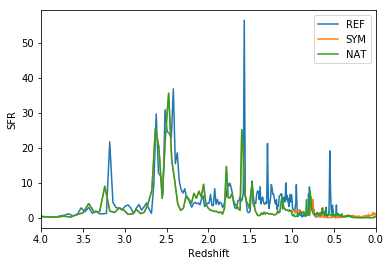

In [34]:
plt.plot(sfrREF.redshift,sfrREF.Msol_yr,label='REF')
plt.plot(sfrSYM.redshift,sfrSYM.Msol_yr,label='SYM')
plt.plot(sfrNAT.redshift,sfrNAT.Msol_yr,label='NAT')
plt.xlim(4,0)
#plt.ylim(0,10)
plt.xlabel('Redshift')
plt.ylabel('SFR')
plt.legend()
plt.show()

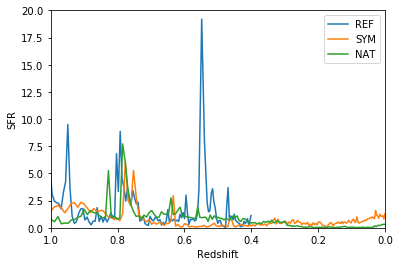

In [35]:
plt.plot(sfrREF.redshift,sfrREF.Msol_yr,label='REF')
plt.plot(sfrSYM.redshift,sfrSYM.Msol_yr,label='SYM')
plt.plot(sfrNAT.redshift,sfrNAT.Msol_yr,label='NAT')
plt.xlim(1,0)
plt.ylim(0,20)
plt.xlabel('Redshift')
plt.ylabel('SFR')
plt.legend()
plt.show()